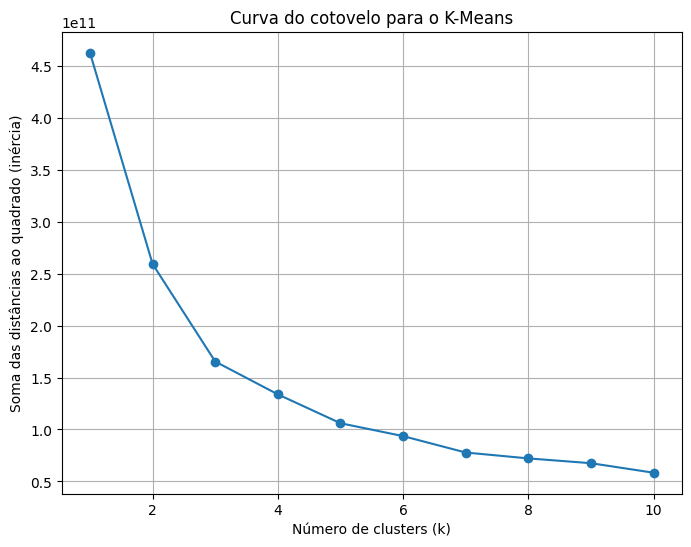

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(r"../dados/wholesale-uci/wholesale_customers.csv", sep=',')
df["Total"] = df.sum(axis=1)

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

inertia = []
k_values = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    k_values.append(i)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.title('Curva do cotovelo para o K-Means')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Soma das distâncias ao quadrado (inércia)')
plt.grid(True)
plt.show()



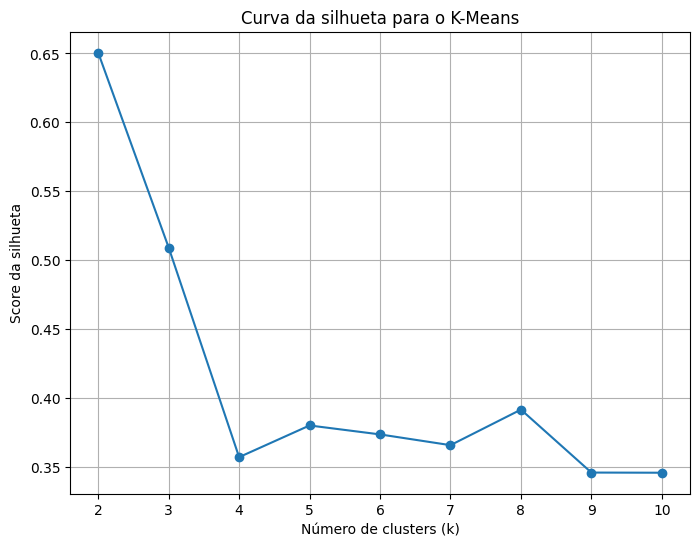

In [51]:
silhouette_scores = []
k_values = [k for k in range(2, 11)]

for k in k_values:
    
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(df)
    
    if len(np.unique(cluster_labels)) >= 2:
        silhouette_avg = silhouette_score(df, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.title('Curva da silhueta para o K-Means')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Score da silhueta')
plt.grid(True)
plt.show()

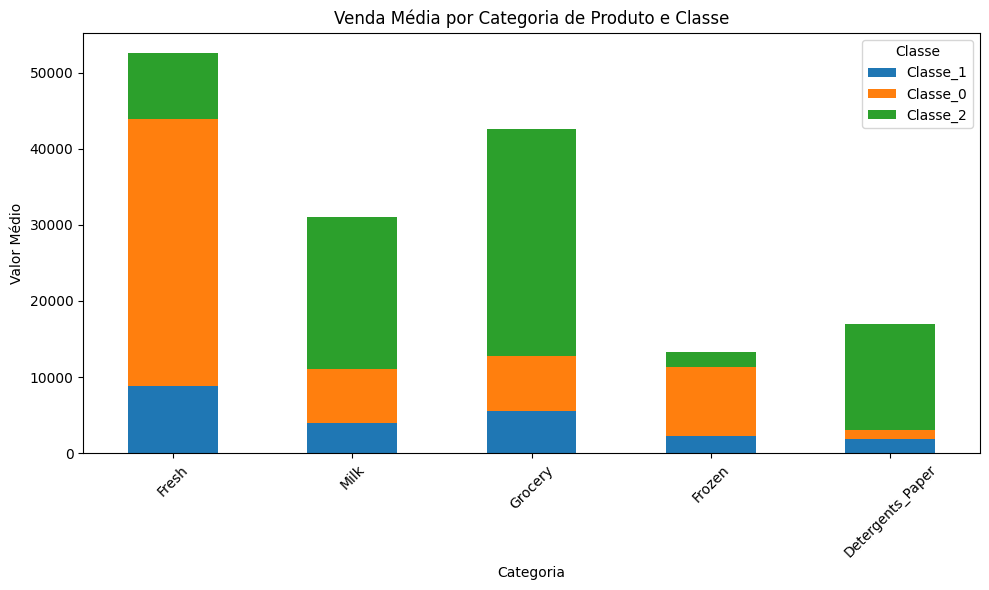

In [53]:
# definindo k = 3
kmeans = KMeans(n_clusters=3, n_init='auto')

categories = df.columns[:5].tolist()

df["Rotulo"] = kmeans.fit_predict(df_scaled)

dict_classes = dict()
dict_classes["Categoria"] = categories

for k in df["Rotulo"].unique():
    dict_classes[f"Classe_{k}"] = df[df["Rotulo"] == k].describe()[categories].loc["mean"].tolist()
    

df_data = pd.DataFrame(dict_classes)
df_data.set_index('Categoria', inplace=True)

ax = df_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Venda Média por Categoria de Produto e Classe')
plt.xlabel('Categoria')
plt.ylabel('Valor Médio')
plt.xticks(rotation=45) 
plt.legend(title='Classe', loc='upper right')
plt.tight_layout()
plt.show()

